<a href="https://colab.research.google.com/github/DarrellSab/Convolutional-neural-network/blob/master/Darius_version_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image recognition from dataset CIFAR-10


If you want to deploy or edit code you should save (File->Save a copy in Drive...). And yoy copy you would use for you purpose.

In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing import image
import matplotlib.pyplot as plt
from scipy.misc import toimage
%matplotlib inline 

Using TensorFlow backend.


In [0]:
# Size of mini-batch
batch_size = 128
# Number of the classes of the images
nb_classes = 10
# Number of epoch for training
nb_epoch = 20
# The size of  image
img_rows, img_cols = 32, 32
# Number of channels: RGB
img_channels = 3
# Names of classes from dataset CIFAR-10
classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## The data preparing

**Load the data**

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

![alt text](https://)**Review of the samples**

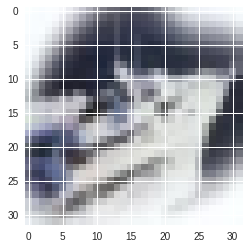

Number of class: [8]
Object type: ship


In [4]:
n = 1515
plt.imshow(toimage(X_train[n]))
plt.show()
print("Number of class:", y_train[n])
print("Object type:", classes[y_train[n][0]])

**Normalize the data**

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

**Change correct answers to format one hot encoding**

In [0]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## Creating neural net

In [0]:
# Creating sequential model
model = Sequential()
# The first convolution layer
model.add(Conv2D(128, (3, 3), padding='same',
                        input_shape=(32, 32, 3), activation='relu'))
#The second convolution layer
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# The first layer of pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# The layer of regulazation Dropout
model.add(Dropout(0.25))

# The third convolution layer
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# The forth convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
# The second layer of pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# The layer of regularization of Dropout
model.add(Dropout(0.25))
# The layer that change from 2D to flatten state
model.add(Flatten())
# Fully connected layer
model.add(Dense(1024, activation='relu'))
# The layer of regularization of Dropout
model.add(Dropout(0.5))
# Output layer
model.add(Dense(nb_classes, activation='softmax'))

**Printing information about the net**

In [9]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       36992     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
__________

**The model compilation**

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Training the neural net

In [10]:
history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 35s - loss: 1.5765 - acc: 0.4253 - val_loss: 1.1573 - val_acc: 0.5880
Epoch 2/20
 - 31s - loss: 1.0904 - acc: 0.6118 - val_loss: 0.8764 - val_acc: 0.7008
Epoch 3/20
 - 31s - loss: 0.8905 - acc: 0.6855 - val_loss: 0.7790 - val_acc: 0.7320
Epoch 4/20
 - 31s - loss: 0.7566 - acc: 0.7322 - val_loss: 0.6935 - val_acc: 0.7636
Epoch 5/20
 - 31s - loss: 0.6623 - acc: 0.7674 - val_loss: 0.6588 - val_acc: 0.7768
Epoch 6/20
 - 31s - loss: 0.5891 - acc: 0.7922 - val_loss: 0.6537 - val_acc: 0.7830
Epoch 7/20
 - 31s - loss: 0.5170 - acc: 0.8177 - val_loss: 0.6058 - val_acc: 0.7994
Epoch 8/20
 - 31s - loss: 0.4636 - acc: 0.8356 - val_loss: 0.6377 - val_acc: 0.7856
Epoch 9/20
 - 31s - loss: 0.4125 - acc: 0.8537 - val_loss: 0.6006 - val_acc: 0.8012
Epoch 10/20
 - 31s - loss: 0.3771 - acc: 0.8661 - val_loss: 0.6642 - val_acc: 0.7936
Epoch 11/20
 - 31s - loss: 0.3342 - acc: 0.8814 - val_loss: 0.6517 - val_acc: 0.7960
Epoch 12/20
 - 31s - loss

## Valuetion of quality model on test data

In [11]:
#judging quality of training model on test data
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Accuracy on test data: 80.41%


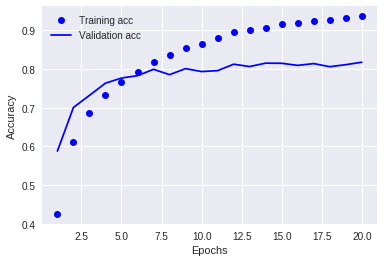

In [12]:
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Saving the trained neural net

In [0]:
model_json = model.to_json()
json_file = open("cifar10_model.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("cifar10_model.h5")

In [14]:
!ls

cifar10_model.h5  cifar10_model.json  sample_data


In [0]:
from google.colab import files

In [0]:
files.download("cifar10_model.json")

In [0]:
files.download("cifar10_model.h5")

## Using net for recognition of objects

**Reviewing data from test dataset**

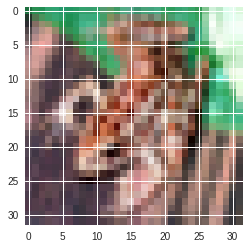

In [18]:
index=95
plt.imshow(toimage(X_test[index]))
plt.show()

**Reshape test image**

In [0]:
x = X_test[index]
x = np.expand_dims(x, axis=0)

**The start of recognition**

In [0]:
prediction = model.predict(x)

**Printing result of recognition**

In [21]:
print(prediction)

[[6.6312986e-21 1.5871395e-22 3.3765183e-14 6.2473200e-09 1.0572663e-12
  6.6709442e-13 1.0000000e+00 1.3395680e-22 2.9297814e-16 1.9132229e-21]]


**Change from format one hot encoding**

In [22]:
prediction = np.argmax(prediction)
print(classes[prediction])

frog


![alt text](https://)**Print correct answer**

In [23]:
print(classes[y_test[index][0]])

frog


## Recogniton yours images

In [30]:
from google.colab import files

files.upload()

Saving frog1.jpg to frog1.jpg


{'frog1.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x13\x12\x12\x15\x12\x13\x13\x15\x16\x15\x17\x15\x15\x18\x16\x18\x18\x17\x18\x17\x15\x18\x18\x16\x15\x17\x17\x17\x15\x17\x15\x18\x1f( \x18\x1a%\x1b\x15\x16"1!%)+...\x17\x1f383-7*-.+\x01\n\n\n\x0e\r\x0e\x1a\x10\x10\x1b-%\x1f%--------------------------------------------------\xff\xc0\x00\x11\x08\x00\xa8\x01,\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x01\x05\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xc4\x00;\x10\x00\x01\x03\x02\x04\x03\x06\x04\x05\x04\x02\x01\x05\x00\x00\x00\x01\x00\x02\x11\x03!\x04\x121A\x05Qa\x13"q\x81\x91\xf0\x06\xa1\xb1\xd12B\xc1\xe1\xf1\x07\x14Rb#r\x16\x153C\x82\xa2\xff\xc4\x00\x19\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xc4\x00)\x11\x00\x02\x02\x02\x02\x02\x02\x00\x05\x05\x00\x00\x00\x00\x00\x00\x00\x01\x02\x11\x03\x12!1AQ\x04\x13\x14"

Verification of downloading files

In [31]:
!ls

cifar10_model.h5  cifar10_model.json  frog1.jpg  sample_data


**Looking to downloaded image**

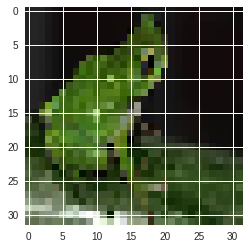

In [32]:
img_path = 'frog1.jpg'
img = image.load_img(img_path, target_size=(32, 32))
plt.imshow(img)
plt.show()

**Reshaping image to array**

In [0]:
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

**The start of recognition**

In [34]:
prediction = model.predict(x)
prediction = np.argmax(prediction)
print(classes[prediction])

frog
